<a href="https://colab.research.google.com/github/shznjihye/Learning/blob/main/%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC%EC%88%98%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요 라이브러리
from bs4 import BeautifulSoup
import requests

In [2]:
# requests로 페이지 정보 불러오기
requests.get('https://www.naver.com/')

<Response [200]>

In [3]:
# 페이지 정보 저장하기
r = requests.get('https://www.naver.com/')
html = r.text


<!doctype html>                 <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 정
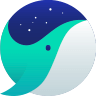
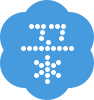

In [4]:
# 페이지 정보를 html로 불러오기 
print(html)

In [5]:
# BeautifulSoup으로 html 파싱하기
soup = BeautifulSoup(html, 'lxml')

In [8]:
 # html의 title 확인하기
 soup.find('title').text
 soup.title.text

'NAVER'

In [10]:
# meta 태그 찾아보기 (find)
soup.find('meta').get('charset')

'utf-8'

In [14]:
# meta 태그 찾아보기 (find_all) _리스트 형식 반환
soup.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=1190" name="viewport"/>,
 <meta content="NAVER" name="apple-mobile-web-app-title"/>,
 <meta content="index,nofollow" name="robots"/>,
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>,
 <meta content="네이버" property="og:title"/>,
 <meta content="https://www.naver.com/" property="og:url"/>,
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>,
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/>,
 <meta content="summary" name="twitter:card"/>,
 <meta content="" name="twitter:title"/>,
 <meta content="https://www.naver.com/" name="twitter:url"/>,
 <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>,
 <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:description"/>]

In [16]:
# 정규표현식 라이브러리 불러오기
import re

In [17]:
# Requests로 페이지 정보 불러오기
requests.get('https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%BD%94%EB%A1%9C%EB%82%98')

<Response [200]>

In [18]:
# 페이지 정보 저장하기 
r = requests.get('https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%BD%94%EB%A1%9C%EB%82%98')
html = r.text

In [19]:
# 페이지 정보를 html로 불러오기 
soup = BeautifulSoup(html, 'lxml')

In [21]:
# BeautifulSoup으로 html 파싱하기
soup.find('a', attrs = { 'class': 'news_tit'}).get('title')

'국산 자가검사키트 2종 첫 품목허가…15분이면 코로나 검사 확인(상보)'

In [23]:
# 영역을 지정하여 검색하기
ul = soup.find('ul', 'list_news')

In [25]:
# 지정한 영역 내에서 검색하기
ul.find('a', 'news_tit')

<a class="news_tit" href="https://www.news1.kr/articles/?4284435" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=08138263_000000000000000005308339&amp;g=421.0005308339&amp;u='+urlencode(this.href));" target="_blank" title="국산 자가검사키트 2종 첫 품목허가…15분이면 코로나 검사 확인(상보)">국산 자가검사키트 2종 첫 품목허가…15분이면 <mark>코로나</mark> 검사 확인(상보)</a>

In [27]:
# 타이틀만
title = ul.find('a', 'news_tit').get('title')
print(title)

국산 자가검사키트 2종 첫 품목허가…15분이면 코로나 검사 확인(상보)


In [28]:
# 패턴을 만들어 리스트 가져오기
news_list = ul.find_all('a', 'news_tit')
print(news_list)

[<a class="news_tit" href="https://www.news1.kr/articles/?4284435" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=1&amp;i=08138263_000000000000000005308339&amp;g=421.0005308339&amp;u='+urlencode(this.href));" target="_blank" title="국산 자가검사키트 2종 첫 품목허가…15분이면 코로나 검사 확인(상보)">국산 자가검사키트 2종 첫 품목허가…15분이면 <mark>코로나</mark> 검사 확인(상보)</a>, <a class="news_tit" href="https://www.hankyung.com/life/article/202104239634H" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=6&amp;i=88000107_000000000000000004535433&amp;g=015.0004535433&amp;u='+urlencode(this.href));" target="_blank" title="권혁수 이어 손준호도 코로나19 확진…연예계 '긴장' [종합]">권혁수 이어 손준호도 <mark>코로나</mark>19 확진…연예계 '긴장' [종합]</a>, <a class="news_tit" href="http://yna.kr/AKR20210423044152504?did=1195m" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=8&amp;i=880000D8_000000000000000012349163&amp;g=001.0012349163&amp;u='+urlencode(this.href));" target="_blank" title="해군 함정서 코로나 첫 집단감염…32명 무더기 확진(종합)">해군 함정서 <mark>코로나</mark> 첫 집단감염…32명 무더기 확진(종합)</a>, <a

In [29]:
print(len(news_list))

10


In [32]:
# URL 출력하기
news_list[0].get('href')

'https://www.news1.kr/articles/?4284435'

In [33]:
# 제목 출력하기
for news in news_list:
  title = news.get('title')
  print(title)

국산 자가검사키트 2종 첫 품목허가…15분이면 코로나 검사 확인(상보)
권혁수 이어 손준호도 코로나19 확진…연예계 '긴장' [종합]
해군 함정서 코로나 첫 집단감염…32명 무더기 확진(종합)
文지지율 31%…‘코로나 대처 미흡’ 지적 급증
권혁수·손준호, '코로나19 확진'이 쏘아올린 빨간불..일파만파 커지는 공연·방송 타격 [종합]
코로나19 자가검사키트 나온다…확진자 급증에 조건부 승인
에베레스트에도 코로나…베이스캠프에 퍼져 셰르파도 확진
손준호 코로나 확진 여파...맨오브라만차·아이위시도 취소
[단독] 특전사도 메인반찬 無? 코로나 격리 대비 못한 유명무실 국방예산
정의선, 코로나 이후 첫 美 출장…GV80 사고 우즈와 만날까
